                  aircraft  transaction_code malfunction_code  \
job_code                                                        
29L1HRLP65324239         1                11              000   
29L1G6WP65246270         1                11              000   
29L1MVAP65126453         1                11              000   
3MNC6U7P6G277488         1                11              381   
3TKLETXP62184570         1                11              000   

                 action_taken_code  \
job_code                             
29L1HRLP65324239                 0   
29L1G6WP65246270                 0   
29L1MVAP65126453                 0   
3MNC6U7P6G277488                 C   
3TKLETXP62184570                 0   

                                             description_of_problem  \
job_code                                                              
29L1HRLP65324239                      Perform a periodic inspection   
29L1G6WP65246270  Perform corrosion prevention treatment on the 

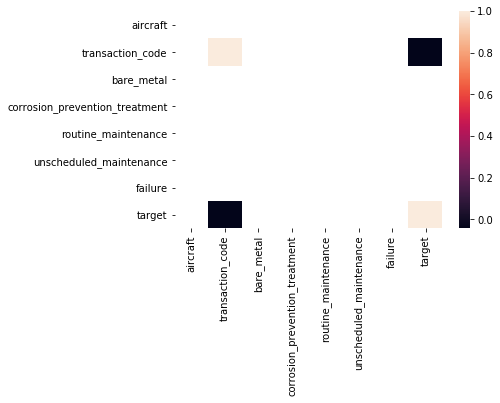

In [49]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
#from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("HtM_MAF_Data_Aircraft1.csv" , index_col=1) 
#data["corrosion"].replace({"Yes": "1"}, inplace=True)

data['target'] = data['corrosion'].apply(lambda x: 1 if x == 'Yes' else 0)
data['bare_metal'] = data['bare_metal'].apply(lambda x: 1 if x == 'yes' else 0)
data['corrosion_prevention_treatment'] = data['corrosion_prevention_treatment'].apply(lambda x: 1 if x == 'yes' else 0)
data['routine_maintenance'] = data['routine_maintenance'].apply(lambda x: 1 if x == 'yes' else 0)
data['unscheduled_maintenance'] = data['unscheduled_maintenance'].apply(lambda x: 1 if x == 'yes' else 0)
data['failure'] = data['failure'].apply(lambda x: 1 if x == 'yes' else 0)

data.drop(data.columns[[0]], axis=1, inplace =True)
print(data.head())
#data.isnull().mean().sort_values(ascending=False)*100

corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)




In [3]:
 # import dependencies
 # C:/ProgramData/Anaconda3/Scripts/activate
# conda activate base
import os, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.ensemble import RandomForestRegressor 

# plt.rcParams['figure.figsize'] = 10,6
import warnings 
warnings.filterwarnings("ignore")





maf_data = pd.read_csv("HtM_MAF_Data_Aircraft1.csv", 
                         dtype = {'Transaction Code': str,
                                 'Aircraft': 'category',
                                 'Transaction Code': 'category',
                                 'Malfunction Code': 'category',
                                 'Action Taken Code': 'category'}) 

msp_data = pd.read_csv("mu_clean.csv")

msp_data['Fault Date'] = pd.to_datetime(msp_data['ZULU_Time'].str.split(" ", n = 2, expand = True)[1])

msp_data['Fault Time'] = pd.to_datetime(msp_data['ZULU_Time'].str.split(" ", n = 2, expand = True)[2], format = '%H:%M:%S:%f', errors= 'ignore')
msp_data['Fault Time'] = pd.to_datetime(msp_data['ZULU_Time'].str.split(" ", n = 2, expand = True)[2], format = '%H:%M:%S', errors= 'ignore')

msp_data['action_year'] = pd.DatetimeIndex(msp_data['Fault Date']).year

maf_data['received_date'] = pd.to_datetime(maf_data['received_date'])

maf_data['completion_date'] = pd.to_datetime(maf_data['completion_date'])

maf_data["action_month"] = pd.DatetimeIndex(maf_data['completion_date']).month

maf_data["action_year"] = pd.DatetimeIndex(maf_data['completion_date']).year

maf_data['aircraft'] = maf_data['aircraft']

print(maf_data)

maf_data.columns = maf_data.columns.to_series().apply(lambda x: x.strip())

print(list(maf_data.columns.values))
print(list(msp_data.columns.values))

maf_data = maf_data.reindex(columns=['job_code', 'aircraft', 'transaction_code', 'malfunction_code', 'action_year','action_taken_code', 'description_of_problem', 'correction_of_problem'])

combined_data = maf_data.merge(msp_data[['Aircraft', 'action_year', 'MSP', 'Flight_Mode', 'Fault Date']], how = 'left', on = ['action_year'])

print(combined_data)

# x= data.iloc[: ,7:8].values

# print(x)

# y= data.iloc[: , 11].values

# regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

# regressor.fit(x, y)   

      Unnamed: 0          job_code  aircraft  transaction_code  \
0              0  29L1HRLP65324239         1                11   
1              1  29L1G6WP65246270         1                11   
2              2  29L1MVAP65126453         1                11   
3              3  3MNC6U7P6G277488         1                11   
4              4  3TKLETXP62184570         1                11   
...          ...               ...       ...               ...   
8318        8318  29L24WZP65240136         1                11   
8319        8319  29L7233P65306177         1                11   
8320        8320  3TP7C99P62165703         1                11   
8321        8321  3TMVHC8P62299744         1                11   
8322        8322  29L2E84P65132476         1                11   

     malfunction_code action_taken_code  \
0                 000                 0   
1                 000                 0   
2                 000                 0   
3                 381              

KeyboardInterrupt: 